# Artificial Intelligence
## L2 International, Univ. Bordeaux

### Lab #5, Supervised Learning (4)

In this lab, we will see how to build a neural network with the Keras framework in Python. As usual, we give an incomplete python program. Some instructions will be used as they are and you do not need to change them. We will comment some of them but we do not need to understand them all. We will use the dataset MNIST, one of the most used datasets in machine learning research. This dataset consists of 70000 images of handwritten digits (of size 28x28).

### Artificial neural networks

Recall that an artificial neural network (ANN for short) consists of a set of layers disposed linearly, and each layer is a set of (artificial) neurons. The model is simplified so that signals can only circulate from the bottom layer to the top layer. Each neuron in the $k$-th layer of the neural network is connected to all the neurons in the $(k − 1)$-th layer, and the neurons in a given layer are all independent from each other.

A neural network consists of the following components

   - An input layer, $x$
    
   - An arbitrary amount of hidden layers
    
   - An output layer, $y$
    
   - A set of weights and biases between each layer, $w$ and $b$

   - A choice of activation function for each hidden layer, $\sigma$.

As usual, we need to import necessary python modules:

In [21]:
import numpy as np
import pandas as pa

And the, load the dataset:

In [22]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

We can start by some manipulations to see what tha data looks like:

In [23]:
print('X_train shape: ',X_train.shape)
print('Y_train shape: ',y_train.shape)

X_train shape:  (60000, 28, 28)
Y_train shape:  (60000,)


We can see that we have 60k images. Each image correspond to 28x28 pixels.

We can also visualise an image:

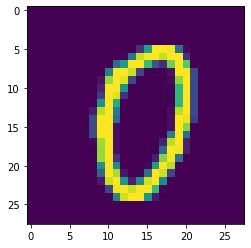

0


In [25]:
from matplotlib import pyplot as plt
%matplotlib inline 
plt.imshow(X_train[1000])
plt.show()

print(y_train[1000])

Now, we need to preprocess our data. In this lab, we will use "simple" architecture for our ANN. Thus, we need to flatten the images to transform them into a vector of size 28x28 = 784 :

In [26]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
print(X_train.shape)

(60000, 784)


We also transform the values of pixels into floats and then normalise the values:

In [27]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
X_train  = X_train / 255
X_test  = X_test / 255

Now, we can define our network. We need to load some necessary libraries:

In [28]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import adam

We also use "one-hot" encoding to encode the classes:

In [29]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

then encode the ANN:

In [30]:
num_classes = y_train.shape[1]

def neural_network():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


We instantiate the model and print it:

In [31]:
model = neural_network()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


and train our supervised learning model:

In [32]:
import warnings
warnings.filterwarnings("ignore")

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=100)#98.36%

scores = model.evaluate(X_test, y_test)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s 20us/step
Neural network accuracy: 96.61%


#### To Do:

Try different hyper parameters and find the best ones to get the best accuracy